In [294]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score, confusion_matrix
from sklearn import tree
from xgboost import plot_tree

In [295]:
data = pd.read_csv("nasa.csv")
data.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219878,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2458161.642,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2457794.969,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2458120.468,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2457902.337,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219878,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2457814.455,135.142133,0.726395,J2000,True


In [296]:
data.describe()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
count,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,...,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000
mean,3.272298e+06,3.272298e+06,22.267865,0.204604,0.457509,204.604203,457.508906,0.127135,0.284283,671.273653,...,1.400264,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242
std,5.486011e+05,5.486011e+05,2.890972,0.369573,0.826391,369.573402,826.391249,0.229642,0.513496,1212.511199,...,0.524154,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627
min,2.000433e+06,2.000433e+06,11.160000,0.001011,0.002260,1.010543,2.259644,0.000628,0.001404,3.315431,...,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285
25%,3.097594e+06,3.097594e+06,20.100000,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,...,1.000635,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289
50%,3.514799e+06,3.514799e+06,21.900000,0.110804,0.247765,110.803882,247.765013,0.068850,0.153954,363.529809,...,1.240981,10.311836,172.625394,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946
75%,3.690060e+06,3.690060e+06,24.500000,0.253837,0.567597,253.837029,567.596853,0.157727,0.352688,832.798679,...,1.678364,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669
max,3.781897e+06,3.781897e+06,32.100000,15.579552,34.836938,15579.552410,34836.938250,9.680682,21.646663,51114.018740,...,5.072008,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000


In [297]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   float64
 13  Rel

In [298]:
plt.figure(figsize=(15, 10))
# Convert date columns to datetime objects
date_columns = ['Close Approach Date', 'Epoch Date Close Approach', 'Orbit Determination Date']
for col in date_columns:
    if col in data.columns:  # Check if column exists in DataFrame
        if col == 'Epoch Date Close Approach':
            # Assuming 'Epoch Date Close Approach' is in Unix timestamp (milliseconds)
            data[col] = pd.to_datetime(data[col], unit='ms')


<Figure size 1500x1000 with 0 Axes>

<h2> As you can see in the heatmap above, there is a lot of similar data in the dataset. We have to exclude them.</h2>

In [299]:
data.isna().sum()

,0
Neo Reference ID,0
Name,0
Absolute Magnitude,0
Est Dia in KM(min),0
Est Dia in KM(max),0
Est Dia in M(min),0
Est Dia in M(max),0
Est Dia in Miles(min),0
Est Dia in Miles(max),0
Est Dia in Feet(min),0


# Data Preparation

In [300]:
label_encoder = LabelEncoder()
data["Label"] = label_encoder.fit_transform(data["Hazardous"])
data.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous,Label
0,3703080,3703080,21.6,0.127220,0.284472,127.219878,284.472297,0.079051,0.176763,417.388066,...,609.599786,0.808259,57.257470,2.005764,2458161.642,264.837533,0.590551,J2000,True,1
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,425.869294,0.718200,313.091975,1.497352,2457794.969,173.741112,0.845330,J2000,False,0
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,643.580228,0.950791,248.415038,1.966857,2458120.468,292.893654,0.559371,J2000,True,1
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,514.082140,0.983902,18.707701,1.527904,2457902.337,68.741007,0.700277,J2000,False,0
4,3514799,3514799,21.6,0.127220,0.284472,127.219878,284.472297,0.079051,0.176763,417.388066,...,495.597821,0.967687,158.263596,1.483543,2457814.455,135.142133,0.726395,J2000,True,1


In [301]:
data["Label"].value_counts()

,count
Label,
0,3932
1,755


In [302]:
categories = list(label_encoder.inverse_transform([0, 1]))
categories

[np.False_, np.True_]

In [303]:
classes = list(set(data["Hazardous"]))
data.drop(["Miss Dist.(Astronomical)","Miss Dist.(lunar)","Miss Dist.(miles)","Relative Velocity km per sec","Est Dia in M(max)","Relative Velocity km per hr","Est Dia in Feet(max)", "Est Dia in Feet(min)", "Est Dia in Miles(max)", "Est Dia in Miles(min)","Est Dia in KM(max)","Est Dia in KM(min)","Neo Reference ID","Orbit ID","Name","Close Approach Date","Equinox","Epoch Date Close Approach","Orbiting Body","Orbit Determination Date","Hazardous"], axis=1, inplace=True)

In [304]:
data.head()

,Absolute Magnitude,Est Dia in M(min),Miles per hour,Miss Dist.(kilometers),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Label
0,21.6,127.219878,13680.50994,62753692.0,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2458161.642,264.837533,0.590551,1
1,21.3,146.067964,40519.17311,57298148.0,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2457794.969,173.741112,0.845330,0
2,20.3,231.502122,16979.66180,7622911.5,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2458120.468,292.893654,0.559371,1
3,27.4,8.801465,24994.83986,42683616.0,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2457902.337,68.741007,0.700277,0
4,21.6,127.219878,22012.95498,61010824.0,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2457814.455,135.142133,0.726395,1


<Axes: >

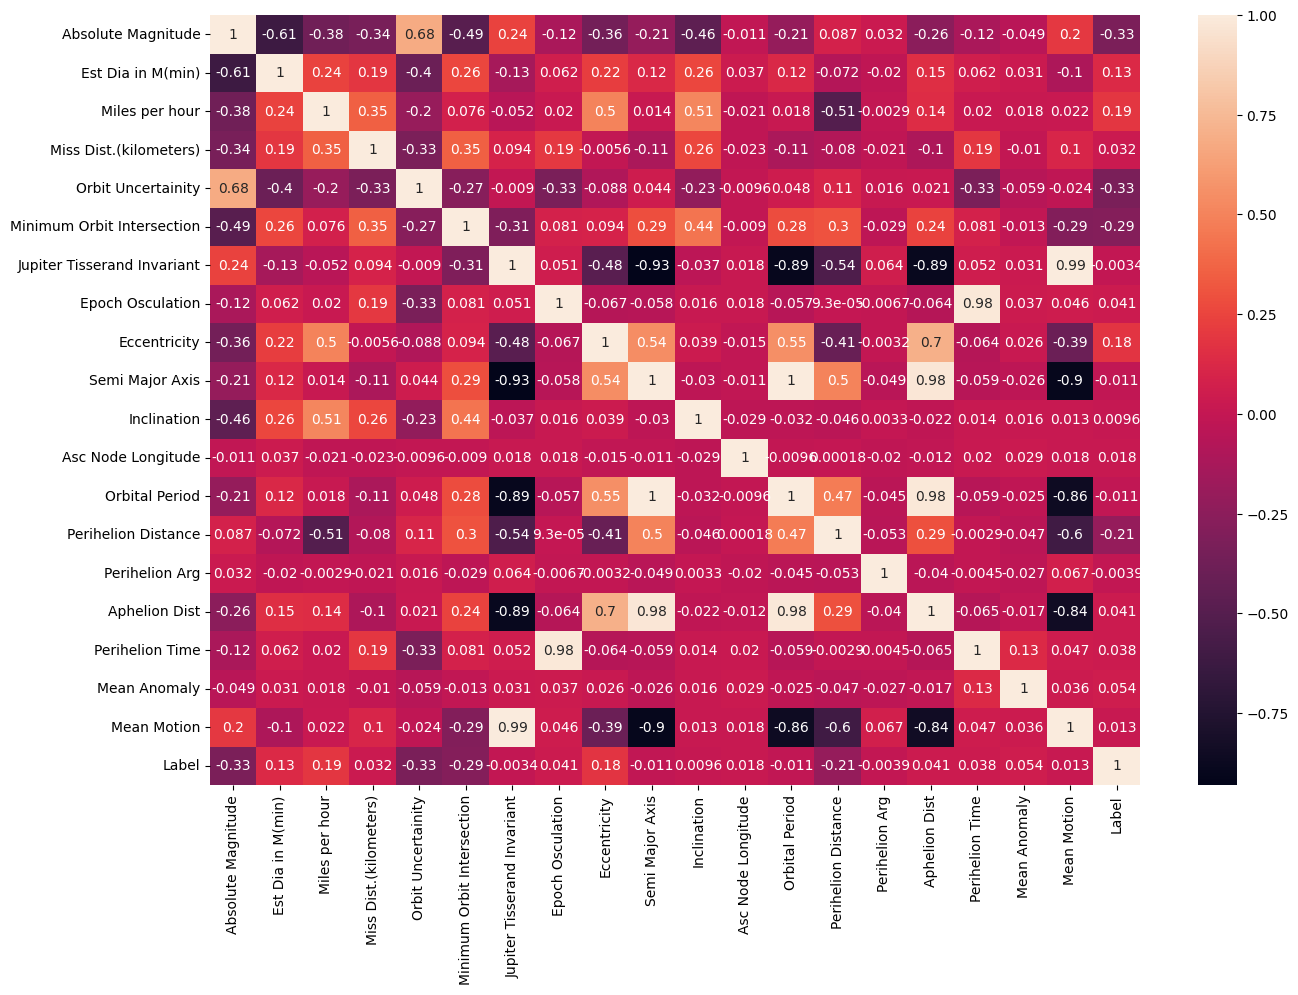

In [305]:
plt.figure(figsize=(15, 10))
corr=data.corr()
sns.heatmap(corr,annot=True)

In [306]:
X, y = data.iloc[: , :-1], data.iloc[: , -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Naive Bayes

In [307]:
nb_model = GaussianNB().fit(X_train,y_train)
print("Accuracy of train:",nb_model.score(X_train,y_train))
print("Accuracy of test:",nb_model.score(X_test,y_test))

Accuracy of train: 0.9496951219512195
Accuracy of test: 0.9530916844349681


In [308]:
#predictions
nb_model_preds = nb_model.predict(X_test)
print(classification_report(y_test,nb_model_preds))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1168
           1       0.86      0.87      0.86       239

    accuracy                           0.95      1407
   macro avg       0.91      0.92      0.92      1407
weighted avg       0.95      0.95      0.95      1407



In [309]:
# Metrics
print("Precision = {}".format(precision_score(y_test, nb_model_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, nb_model_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, nb_model_preds)))
print("F1 Score = {}".format(f1_score(y_test, nb_model_preds,average='macro')))

Precision = 0.914667387891901
Recall = 0.9201635668023156
Accuracy = 0.9530916844349681
F1 Score = 0.9173843263133172


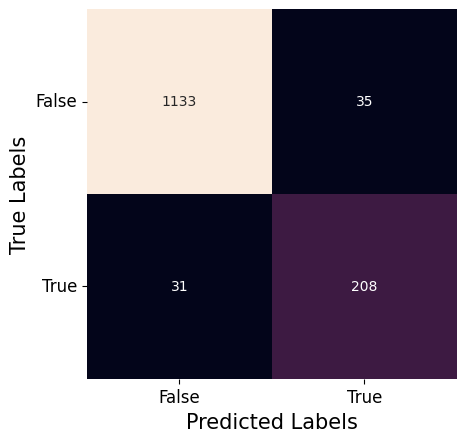

In [310]:
cm = confusion_matrix(y_test, nb_model_preds)
ax =sns.heatmap(cm, square=True, annot=True, cbar=False, fmt='g')
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

# Logistic Regression

In [311]:
log_reg_model = LogisticRegression().fit(X_train, y_train)
print("Accuracy of train:",log_reg_model.score(X_train,y_train))
print("Accuracy of test:",log_reg_model.score(X_test,y_test))

Accuracy of train: 0.9576219512195122
Accuracy of test: 0.9530916844349681


In [312]:
#predictions
log_reg_preds = log_reg_model.predict(X_test)
print(classification_report(y_test,log_reg_preds))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1168
           1       0.88      0.83      0.86       239

    accuracy                           0.95      1407
   macro avg       0.93      0.91      0.91      1407
weighted avg       0.95      0.95      0.95      1407



In [313]:
# Metrics
print("Precision = {}".format(precision_score(y_test, log_reg_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, log_reg_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, log_reg_preds)))
print("F1 Score = {}".format(f1_score(y_test, log_reg_preds,average='macro')))

Precision = 0.9253017484489565
Recall = 0.9051878546454978
Accuracy = 0.9530916844349681
F1 Score = 0.9148367571533382


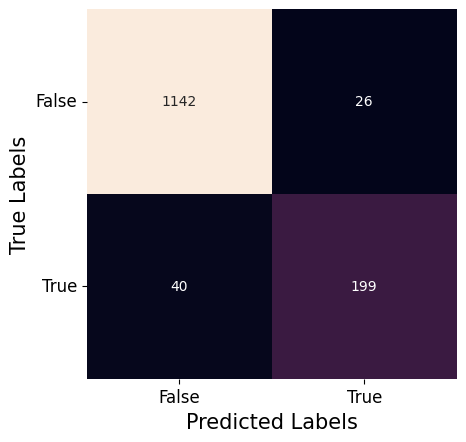

In [314]:
cm = confusion_matrix(y_test, log_reg_preds)
ax =sns.heatmap(cm, square=True, annot=True, cbar=False, fmt='g')
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

# Random Forest

In [315]:
rf_model = RandomForestClassifier().fit(X_train, y_train)
print("Accuracy of train:",rf_model.score(X_train,y_train))
print("Accuracy of test:",rf_model.score(X_test,y_test))

Accuracy of train: 1.0
Accuracy of test: 0.9971570717839374


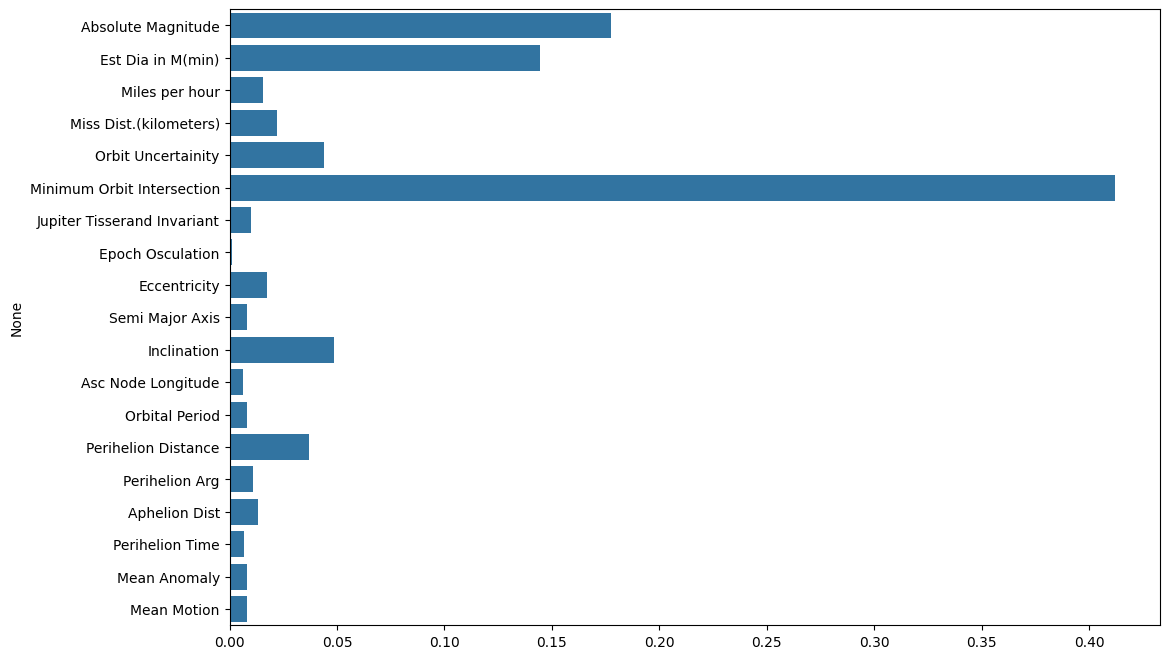

In [316]:
#Feature Importance
plt.figure(figsize=(12, 8))
sns.barplot(x=rf_model.feature_importances_, y=X.columns)
plt.show()

In [317]:
#predictions
rf_model_preds = rf_model.predict(X_test)
print(classification_report(y_test,rf_model_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1168
           1       1.00      0.99      0.99       239

    accuracy                           1.00      1407
   macro avg       1.00      0.99      0.99      1407
weighted avg       1.00      1.00      1.00      1407



In [318]:
# Metrics
print("Precision = {}".format(precision_score(y_test, rf_model_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, rf_model_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, rf_model_preds)))
print("F1 Score = {}".format(f1_score(y_test, rf_model_preds,average='macro')))

Precision = 0.9966082440765985
Recall = 0.9932957671806042
Accuracy = 0.9971570717839374
F1 Score = 0.9949428873345746


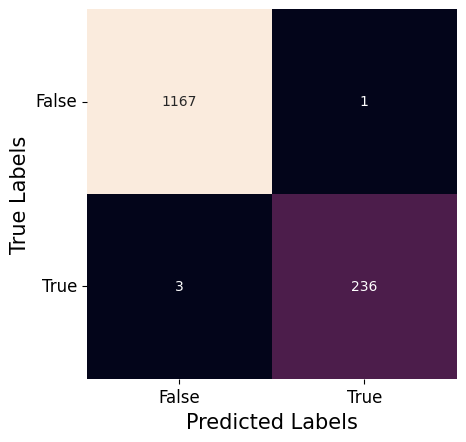

In [319]:
cm = confusion_matrix(y_test, rf_model_preds)
ax =sns.heatmap(cm, square=True, annot=True, cbar=False, fmt='g')
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

# Decision Tree

In [320]:
dec_tree = DecisionTreeClassifier().fit(X_train,y_train)
print("Accuracy of train:",dec_tree.score(X_train,y_train))
print("Accuracy of test:",dec_tree.score(X_test,y_test))

Accuracy of train: 1.0
Accuracy of test: 0.9964463397299218


[Text(0.5113636363636364, 0.9285714285714286, 'x[5] <= -0.362\ngini = 0.265\nsamples = 3280\nvalue = [2764, 516]'),
 Text(0.4659090909090909, 0.7857142857142857, 'x[0] <= -0.078\ngini = 0.427\nsamples = 1671\nvalue = [1155, 516]'),
 Text(0.48863636363636365, 0.8571428571428572, 'True  '),
 Text(0.22727272727272727, 0.6428571428571429, 'x[1] <= -0.256\ngini = 0.023\nsamples = 512\nvalue = [6, 506]'),
 Text(0.13636363636363635, 0.5, 'x[5] <= -0.54\ngini = 0.496\nsamples = 11\nvalue = [5, 6]'),
 Text(0.09090909090909091, 0.35714285714285715, 'x[10] <= -0.274\ngini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(0.045454545454545456, 0.21428571428571427, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.13636363636363635, 0.21428571428571427, 'x[13] <= -0.131\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.09090909090909091, 0.07142857142857142, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.18181818181818182, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Tex

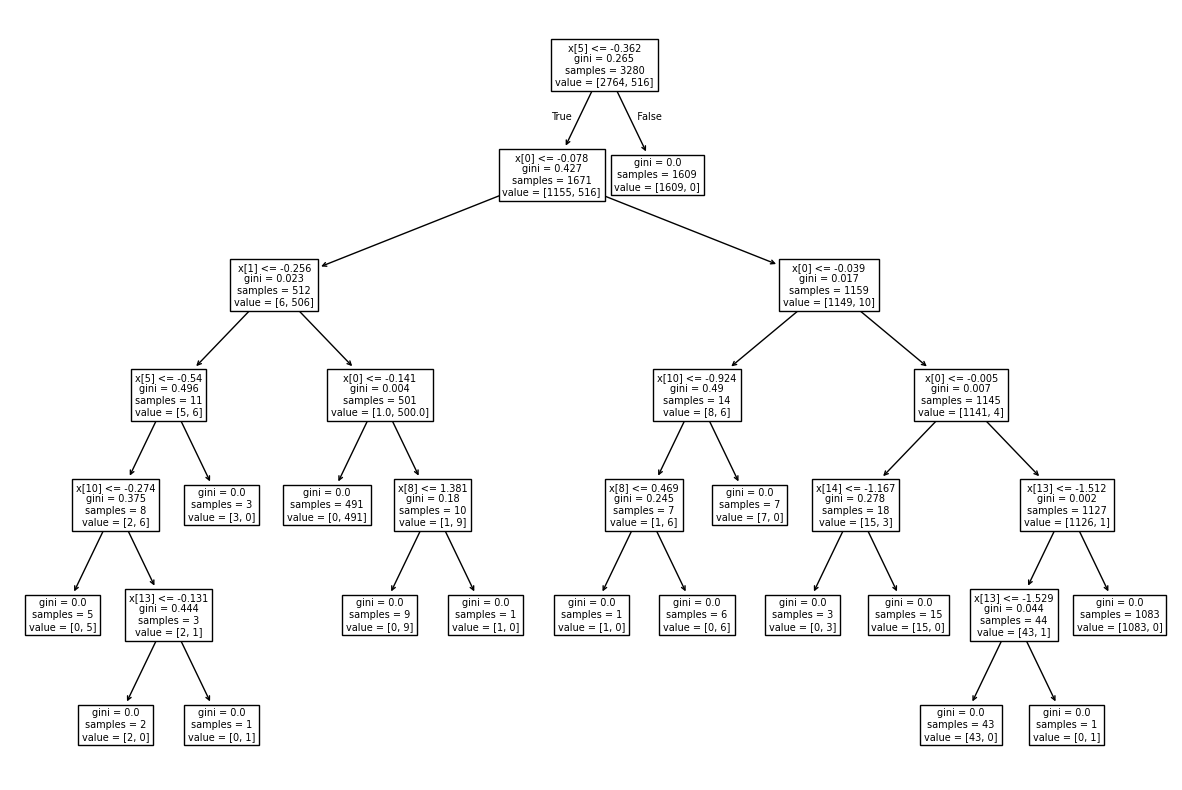

In [321]:
plt.figure(figsize=(15, 10))
tree.plot_tree(dec_tree)

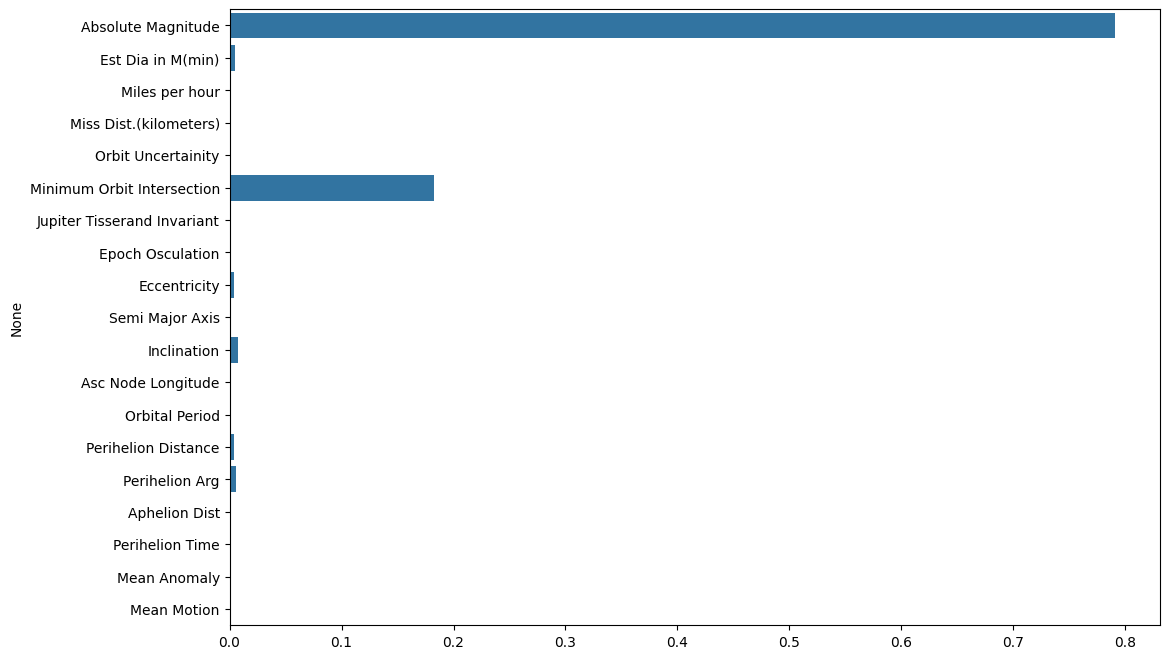

In [322]:
#Feature Importance
plt.figure(figsize=(12, 8))
sns.barplot(x=dec_tree.feature_importances_, y=X.columns)
plt.show()

In [323]:
#predictions
dec_tree_preds = dec_tree.predict(X_test)
print(classification_report(y_test,dec_tree_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1168
           1       1.00      0.98      0.99       239

    accuracy                           1.00      1407
   macro avg       1.00      0.99      0.99      1407
weighted avg       1.00      1.00      1.00      1407



In [324]:
# Metrics
print("Precision = {}".format(precision_score(y_test, dec_tree_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, dec_tree_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, dec_tree_preds)))
print("F1 Score = {}".format(f1_score(y_test, dec_tree_preds,average='macro')))

Precision = 0.996173414002229
Recall = 0.9912037169713991
Accuracy = 0.9964463397299218
F1 Score = 0.9936680092707184


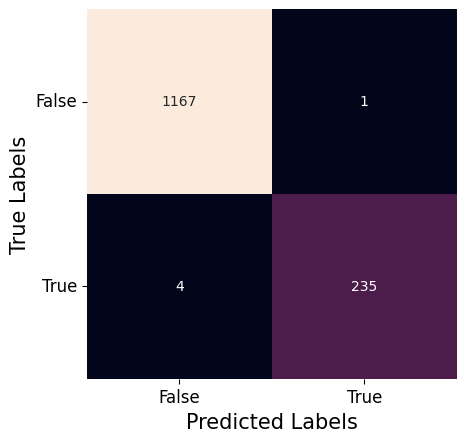

In [325]:
cm = confusion_matrix(y_test, dec_tree_preds)
ax =sns.heatmap(cm, square=True, annot=True, cbar=False, fmt='g')
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

# KNN

In [326]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
print("Accuracy of train:",knn.score(X_train,y_train))
print("Accuracy of test:",knn.score(X_test,y_test))

Accuracy of train: 0.911280487804878
Accuracy of test: 0.898365316275764


In [327]:
#predictions
Knn_preds = knn.predict(X_test)
print(classification_report(y_test,Knn_preds))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1168
           1       0.84      0.50      0.62       239

    accuracy                           0.90      1407
   macro avg       0.87      0.74      0.78      1407
weighted avg       0.89      0.90      0.89      1407



In [328]:
# Metrics
print("Precision = {}".format(precision_score(y_test, Knn_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, Knn_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, Knn_preds)))
print("F1 Score = {}".format(f1_score(y_test, Knn_preds,average='macro')))

Precision = 0.8715832544675166
Recall = 0.7391080844844387
Accuracy = 0.898365316275764
F1 Score = 0.7829483706645177


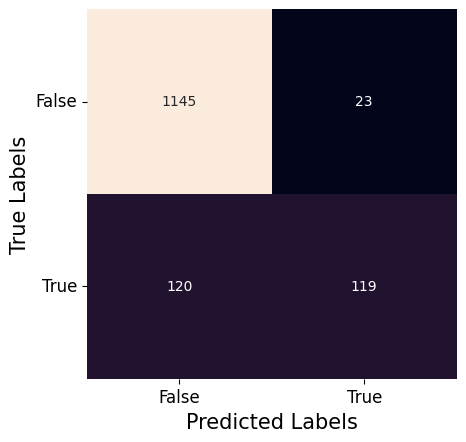

In [329]:
cm = confusion_matrix(y_test, Knn_preds)
ax =sns.heatmap(cm, square=True, annot=True, cbar=False, fmt='g')
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

# SVM

In [330]:
svm = SVC(random_state=2)
svm.fit(X_train, y_train)
print("Accuracy of train:",svm.score(X_train,y_train))
print("Accuracy of test:",svm.score(X_test,y_test))

Accuracy of train: 0.9628048780487805
Accuracy of test: 0.9474058280028429


In [331]:
#predictions
svm_preds = svm.predict(X_test)
print(classification_report(y_test,svm_preds))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1168
           1       0.89      0.79      0.84       239

    accuracy                           0.95      1407
   macro avg       0.92      0.89      0.90      1407
weighted avg       0.95      0.95      0.95      1407



In [332]:
# Metrics
print("Precision = {}".format(precision_score(y_test, svm_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, svm_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, svm_preds)))
print("F1 Score = {}".format(f1_score(y_test, svm_preds,average='macro')))

Precision = 0.9227239483803997
Recall = 0.8851235169370093
Accuracy = 0.9474058280028429
F1 Score = 0.9024769019804726


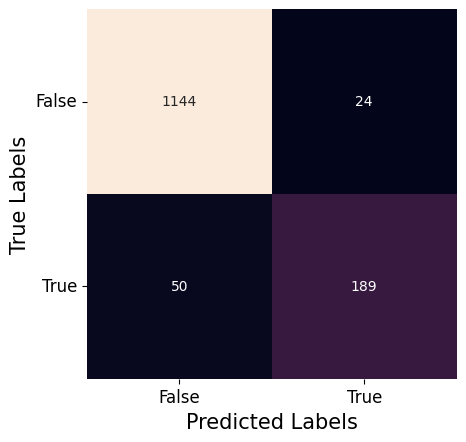

In [333]:
cm = confusion_matrix(y_test, svm_preds)
ax =sns.heatmap(cm, square=True, annot=True, cbar=False, fmt='g')
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

# Deep Learning

In [334]:
dl_model = Sequential()
dl_model.add(Dense(20, activation='relu', input_shape=X_train.shape))
dl_model.add(Dense(50, activation='relu'))
dl_model.add(Dense(50, activation='relu'))
dl_model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [335]:
dl_model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_48 (Dense)                │ (None, 3280, 20)       │           400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 3280, 50)       │         1,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 3280, 50)       │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 3280, 1)        │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,051 (15.82 KB)

 Trainable params: 4,051 (15.82 KB)

 Non-trainable params: 0 (0.00 B)

In [336]:
dl_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [337]:
dl_model.add(Dense(20, activation='relu', input_shape=X_train.shape))

In [338]:
dl_model = Sequential()
dl_model.add(Dense(20, activation='relu', input_shape=(X_train.shape[1],))) # Correct input shape
dl_model.add(Dense(50, activation='relu'))
dl_model.add(Dense(50, activation='relu'))
dl_model.add(Dense(1, activation='sigmoid'))

# ... (rest of your code) ...

# Remove the line that adds another input layer:
# dl_model.add(Dense(20, activation='relu', input_shape=X_train.shape)) # This line is incorrect and should be removed

# ... (rest of your code) ...

Epoch 1/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7929 - loss: 0.4859 - val_accuracy: 0.8493 - val_loss: 0.2987
Epoch 2/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8646 - loss: 0.2718 - val_accuracy: 0.9147 - val_loss: 0.1971
Epoch 3/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9338 - loss: 0.1691 - val_accuracy: 0.9446 - val_loss: 0.1424
Epoch 4/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9505 - loss: 0.1264 - val_accuracy: 0.9545 - val_loss: 0.1248
Epoch 5/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9611 - loss: 0.1015 - val_accuracy: 0.9545 - val_loss: 0.1074
Epoch 6/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9743 - loss: 0.0746 - val_accuracy: 0.9595 - val_loss: 0.1077
Epoch 7/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9727 - loss: 0.0702 - val_accuracy: 0.9538 - val_loss: 0.1021
Epoch 8/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9736 - loss: 0.0691 - val_accuracy: 0.

Text(0, 0.5, 'Loss')

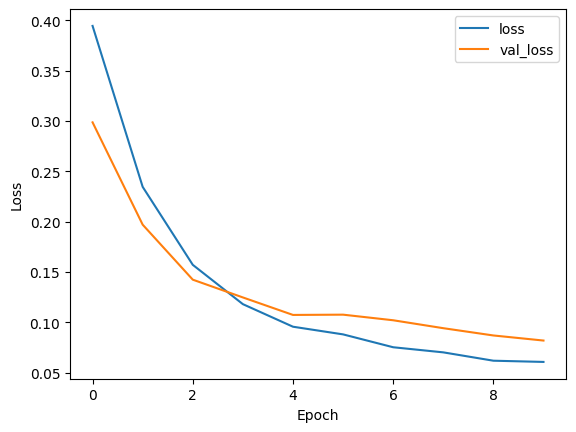

In [339]:
# Fit the model and store the training history
dl_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # Compile the model before fitting
dl_model_history = dl_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test)) # Example with 10 epochs and validation data

# Now you can access the history:
plt.plot(dl_model_history.history['loss'])
plt.plot(dl_model_history.history['val_loss'])
plt.legend(["loss","val_loss"])
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [340]:
#predictions
dl_model_preds = dl_model.predict(X_test)
print(classification_report(y_test,dl_model_preds.round()))

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1168
           1       0.90      0.90      0.90       239

    accuracy                           0.97      1407
   macro avg       0.94      0.94      0.94      1407
weighted avg       0.97      0.97      0.97      1407



In [341]:
# Metrics
print("Precision = {}".format(precision_score(y_test, dl_model_preds.round(), average='macro')))
print("Recall = {}".format(recall_score(y_test, dl_model_preds.round(), average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, dl_model_preds.round())))
print("F1 Score = {}".format(f1_score(y_test, dl_model_preds.round(),average='macro')))

Precision = 0.9407930325651844
Recall = 0.9378528543589155
Accuracy = 0.9658848614072495
F1 Score = 0.9393146480148946


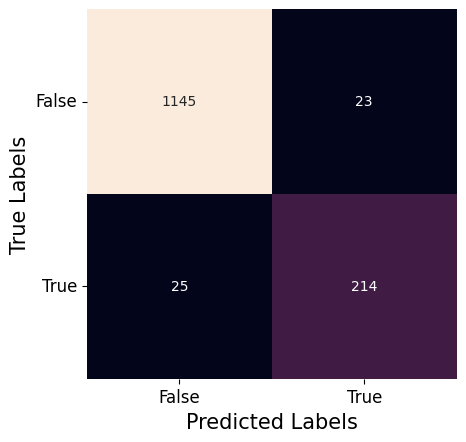

In [342]:
cm = confusion_matrix(y_test, dl_model_preds.round())
ax =sns.heatmap(cm, square=True, annot=True, cbar=False, fmt='g')
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [343]:
accuracies={}
acc_n=accuracy_score(y_test, nb_model_preds)
accuracies['Naive Bayes'] = acc_n*100
acc_l=accuracy_score(y_test, log_reg_preds)
accuracies['Logistic Regression'] = acc_l*100
acc_r=accuracy_score(y_test, rf_model_preds)
accuracies['Random Forest'] = acc_r*100
acc_dt=accuracy_score(y_test, dec_tree_preds)
accuracies['Decision Tree'] = acc_dt*100
acc_knn=accuracy_score(y_test, Knn_preds)
accuracies['KNN'] = acc_knn*100
acc_svm=accuracy_score(y_test, svm_preds)
accuracies['SVM'] = acc_svm*100
acc_d=accuracy_score(y_test, dl_model_preds.round())
accuracies['Deep Learning'] = acc_d*100

In [344]:
#All Accuracies
Accuracies = pd.Series([acc_n, acc_l, acc_r, acc_dt, acc_knn, acc_svm,acc_d],
                        index=['Naive_Bayes_accuracy','Logistic_Regression_accuracy', 'Random_Forest_accuracy', 'Decision_Tree_accuracy', 'KNN_accuracy', 'SVM_accuracy', 'Deep_Learning_accuracy'])
Accuracies

,0
Naive_Bayes_accuracy,0.953092
Logistic_Regression_accuracy,0.953092
Random_Forest_accuracy,0.997157
Decision_Tree_accuracy,0.996446
KNN_accuracy,0.898365
SVM_accuracy,0.947406
Deep_Learning_accuracy,0.965885


<ipython-input-345-3541f9462928>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors )


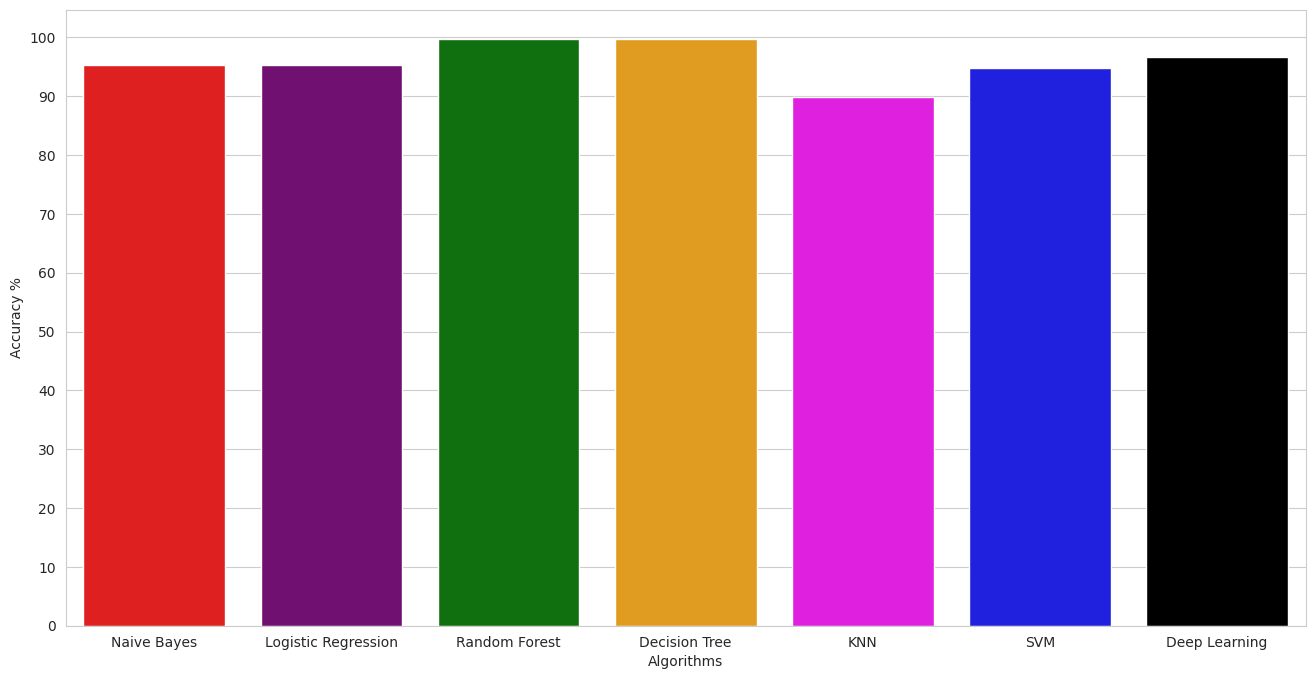

In [345]:
#Comparing Accuracies
colors = ["red","purple", "green", "orange", "magenta","blue","black"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
plt.yticks(np.arange(0,1200,10))
plt.ylabel("Accuracy %")#percent so multiply by 100
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors )
plt.show()

In [346]:
accuracy_df = pd.DataFrame(list(accuracies.items()), columns=["Model", "Accuracy"])
accuracy_df.to_csv("accuracies.csv", index=False)

streamlit app


In [360]:
%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read accuracy CSV
compare_accuracy_df = pd.read_csv("accuracies.csv")
accuracies = dict(zip(compare_accuracy_df['Model'], compare_accuracy_df['Accuracy']))
df = pd.DataFrame(list(accuracies.items()), columns=["Model", "Accuracy"])

# Apply dark theme background
st.markdown("""
    <style>
        body {
            background-color: #0f1117;
            color: #f0f2f6;
        }
        .main {
            background-color: #0f1117;
        }
        .reportview-container {
            background: #0f1117;
        }
        h1, h2, h3, h4, h5, h6 {
            color: #00ffe0;
        }
        .block-container {
            padding-top: 2rem;
            padding-bottom: 2rem;
        }
    </style>
""", unsafe_allow_html=True)

# Dashboard title
st.title("🚀 ML Model Accuracy Dashboard")
st.markdown("---")

# Section 1 - Accuracy Table
st.markdown("### 📋 Accuracy Scores by Model")
st.markdown("""
    <div style='background-color:#1e2130; padding:20px; border-radius:10px'>
""", unsafe_allow_html=True)
st.dataframe(df.sort_values(by="Accuracy", ascending=False), use_container_width=True)
st.markdown("</div>", unsafe_allow_html=True)

# Section 2 - Bar Plot
st.markdown("### 📊 Accuracy Comparison")
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=df, x="Model", y="Accuracy", palette="coolwarm", ax=ax)
ax.set_ylim(0, 100)
ax.set_ylabel("Accuracy (%)")
ax.set_title("Model Accuracy Comparison")
plt.xticks(rotation=45)
st.pyplot(fig)

# Section 3 - Best Model Highlight
best_model = df.loc[df["Accuracy"].idxmax()]
st.markdown("### 🏆 Best Model Highlight")
st.markdown(
    f"""
    <div style="
        background-color:#1a1a2e;
        border-left: 5px solid #00f2ff;
        padding: 30px;
        border-radius: 15px;
        margin-top: 20px;
        text-align: center;
    ">
        <h3 style="color:#ffffff;">🔥 Best Performing Model</h3>
        <h1 style="color:#00ffcc;">{best_model['Model']} — {best_model['Accuracy']:.2f}%</h1>
    </div>
    """,
    unsafe_allow_html=True
)


Overwriting app.py


In [359]:
from pyngrok import ngrok

# Kill previous tunnels if any
!pkill streamlit

# Run Streamlit in the background
!streamlit run app.py &>/content/logs.txt &

# Start tunnel using HTTP config
public_url = ngrok.connect("http://localhost:8501")
print(f"🔗 Streamlit app is live at: {public_url}")

🔗 Streamlit app is live at: NgrokTunnel: "https://42d2-34-28-229-45.ngrok-free.app" -> "http://localhost:8501"


In [353]:
!ngrok authtoken 1y4FrifjAaYqr9SHsKTJo8dRiyg_7h44pWdjJbJsdkBjvG6VX

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
